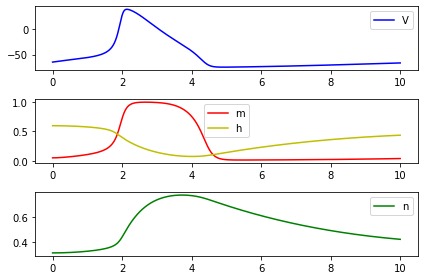

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

# 平衡状態にする
t=0.0 # t has ms scale.
dt=0.01 # t has ms scale.
endTime=50.0 # t has ms scale.
steps=endTime/dt
v = -65 
I_app = 0
V_Na = 50
V_K = -77
V_L = -54.387
g_Na = 120
g_K = 36
g_L = 0.3
C_m = 1.0 #uF/cm^2
m = 0.05
n = 0.6
h = 0.32
for step in range(int(steps)):
    t += dt #時間をすすめる
    a_m = 0.1*(v+40.0)/(1.0 - math.exp(-(v+40.0) / 10.0))
    b_m = 4.0*math.exp(-(v+65.0) / 18.0)
    a_h = 0.07*math.exp(-(v+65.0) / 20.0)
    b_h = 1.0/(1.0 + math.exp(-(v+35.0) / 10.0))
    a_n = 0.01*(v+55.0)/(1.0 - math.exp(-(v+55.0) / 10.0))
    b_n = 0.125*math.exp(-(v+65) / 80.0)
    I_Na = (m**3)*h*g_Na*(v-V_Na)
    I_K = (n**4)*g_K*(v-V_K)
    I_L = g_L*(v-V_L)
    dv_dt = (-I_L-I_K-I_Na+I_app)/C_m
    v += dv_dt * dt
    dm_dt = a_m*(1-m) - b_m*m
    m += dm_dt * dt
    dn_dt = a_n*(1-n) - b_n*n
    n += dn_dt * dt
    dh_dt = a_h*(1-h) - b_h*h
    h += dh_dt * dt

# 実際の計算
t=0.0 # t has ms scale.
dt=0.0005 # t has ms scale.
endTime=10.0 # t has ms scale.
steps=endTime/dt
t2_array=np.arange(0,endTime,dt)
v2_array=np.array([])
m2_array=np.array([])
n2_array=np.array([])
h2_array=np.array([])

I_app = 10
for step in range(int(steps)):
    t += dt #時間をすすめる
    a_m = 0.1*(v+40.0)/(1.0 - math.exp(-(v+40.0) / 10.0))
    b_m = 4.0*math.exp(-(v+65.0) / 18.0)
    a_h = 0.07*math.exp(-(v+65.0) / 20.0)
    b_h = 1.0/(1.0 + math.exp(-(v+35.0) / 10.0))
    a_n = 0.01*(v+55.0)/(1.0 - math.exp(-(v+55.0) / 10.0))
    b_n = 0.125*math.exp(-(v+65) / 80.0)
    I_Na = (m**3)*h*g_Na*(v-V_Na)
    I_K = (n**4)*g_K*(v-V_K)
    I_L = g_L*(v-V_L)
    dv_dt = (-I_L-I_K-I_Na+I_app)/C_m
    v += dv_dt * dt
    dm_dt = a_m*(1-m) - b_m*m
    m += dm_dt * dt
    dn_dt = a_n*(1-n) - b_n*n
    n += dn_dt * dt
    dh_dt = a_h*(1-h) - b_h*h
    h += dh_dt * dt
    v2_array=np.append(v2_array,v)
    n2_array=np.append(n2_array,n)
    m2_array=np.append(m2_array,m)
    h2_array=np.append(h2_array,h)
    
fig = plt.figure()
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
ax1.plot(t2_array,v2_array,c='b', label = 'V')
ax1.legend()
ax2.plot(t2_array,m2_array,c='r', label = 'm')
ax3.plot(t2_array,n2_array,c='g', label = 'n')
ax3.legend()
ax2.plot(t2_array,h2_array,c='y', label = 'h')
ax2.legend()
fig.tight_layout()              #レイアウトの設定
plt.show()